# MATH50003 Numerical Analysis: Problem Sheet 6

This problem sheet explores condition numbers, indefinite integration,
and Euler's metohd.

Questions marked with a ⋆ are meant to be completed without using a computer.

In [1]:
using LinearAlgebra, Plots

## 1. Condition numbers


**Problem 1.1⋆** Prove that, if $|ϵ_i| ≤ ϵ$ and $n ϵ < 1$, then
$$
\prod_{k=1}^n (1+ϵ_i) = 1+θ_n
$$
for some constant $θ_n$ satisfying $|θ_n| ≤ {n ϵ \over 1-nϵ}$.

**Problem 1.2⋆** Let $A,B ∈ ℝ^{m × n}$. Prove that if the columns satisfy $\|𝐚_j\|_2 ≤ \| 𝐛_j\|_2$ then
$\|A\|_F ≤ \|B\|_F$ and $\|A \|_2 ≤ \sqrt{\hbox{rank}(B)} \|B\|_2$.

**Problem 1.3⋆** Compute the 1-norm, 2-norm, and ∞-norm condition numbers for the following matrices:
$$
\begin{bmatrix}
1 & 2 \\ 3 & 4
\end{bmatrix}, \begin{bmatrix}
1/3 & 1/5 \\ 0 & 1/7
\end{bmatrix}, \begin{bmatrix} 1 \\ & 1/2 \\ && ⋯ \\ &&& 1/2^n \end{bmatrix}
$$
(Hint: recall that the singular values of a matrix $A$ are the square roots of the eigenvalues of the Gram matrix
$A^⊤A$.)


**Problem 1.4**
What bound on the relative error on $A 𝐯$ for $\|𝐯\|_2 = 1$ give for the following matrices:
$$
\begin{bmatrix}
1/3 & 1/5 \\ 0 & 1/10^3
\end{bmatrix},
 \begin{bmatrix} 1 \\ & 1/2 \\ && ⋯ \\ &&& 1/2^{10} \end{bmatrix}
$$
Compute the relative error (using `big` for a high-precision version to compare against)
where $𝐯$ is a column of $V$ in the SVD $A = U Σ V^⊤$, computed using the `svd` command with
`Float64` inputs.





## 2. Indefinite integration

**Problem 2.1** Implement backward differences to approximate
 indefinite-integration. How does the error compare to forward
 and mid-point versions  for $f(x) = \cos x$ on the interval $[0,1]$?


**Problem 2.2** Implement indefinite-integration 
where we take the average of the two grid points:
$$
{u'(x_{k+1}) + u'(x_k) \over 2} ≈ {u_{k+1} - u_k \over h}
$$
What is the observed rate-of-convergence using the ∞-norm for $f(x) = \cos x$
on the interval $[0,1]$?
Does the method converge if the error is measured in the $1$-norm?

**SOLUTION**

In [2]:
n = 1000
x = range(0, 1; length=n+1)
h = 1/n
A = Bidiagonal([1; fill(1/h, n)], fill(-1/h, n), :L)
c = 0 # u(0) = 0
f = x -> cos(x)

𝐟 = f.(x) # evaluate f at all but last points
uₙ = A \ [c; (𝐟[1:end-1] + 𝐟[2:end])/2]


norm(uₙ - sin.(x),1)

3.8343199809834404e-5

**END**

## 3. Euler methods

**Problem 3.1⋆** For an evenly spaced grid $t_1, …, t_n$, use the approximation
$$
{u'(x_{k+1}) + u'(x_k) \over 2} ≈ {u_{k+1} - u_k \over h}
$$
to recast
$$
\begin{align*}
u(0) &= c \\
u'(t) &= a(t) u(t) + f(t)
\end{align*}
$$
as a lower bidiagonal linear system. Use forward-substitution to extend this to vector linear problems:
$$
\begin{align*}
𝐮(0) &= 𝐜 \\
𝐮'(t) &= A(t) 𝐮(t) + 𝐟(t)
\end{align*}
$$


**Problem 3.2** Implement the method designed in Problem 3.1 for the negative time Airy equation 
$$
u(0) = 1, u'(0) = 0, u''(t) = -t u(t)
$$
on $[0,50]$.
How many time-steps are needed to get convergence to 1% accuracy (the "eyeball norm")?

**Problem 3.3** Use `Dual` and Newton iteration to find a frequency `ω` such that
the heat on a graph with 50 nodes is equal to zero at time $T = 0$ at node $25$, using Forward Euler
with 200 time-steps to approximate the solution to the differential equation.
(Hint: use `Uᶠ = zeros(typeof(ω), m, n)` to ensure duals are allowed and use an initial guess of
`ω = 1`.)

**SOLUTION**

In [3]:
using DualNumbers

function heat(ω)
    n = 200 # number of time-steps
    t = range(0, 1; length=n)
    h = step(t)

    m = 50 # number of nodes
    Δ = SymTridiagonal([-1; fill(-2.0, m-2); -1], ones(m-1))

    Uᶠ = zeros(typeof(ω), m, n) # each column is a time-slice for forward Euler

    Uᶠ[:,1] = zeros(m) # initial condition

    for k = 1:n-1
        Uᶠ[:,k+1] = (I + h*Δ)*Uᶠ[:,k]
        Uᶠ[m÷2,k+1] += h*cos(ω * t[k]) # add forcing at 𝐞_1
    end
    Uᶠ[m÷2,end]
end

ω = 1.0
hω = heat(Dual(ω,1))
ω = ω - dualpart(hω) \ realpart(hω)

3.032550973486549

**Problem 3.4** Consider the equation
$$
u(1) = 1, u'(t) = -10u(t)
$$
What behaviour do you observe on $[0,10]$ of forward, backward, and that of Problem 3.1
with a step-size of 0.5? What happens if you decrease the step-size to $0.01$? (Hint: you may wish to do a plot and scale the $y$-axis logarithmically,)

**SOLUTION**

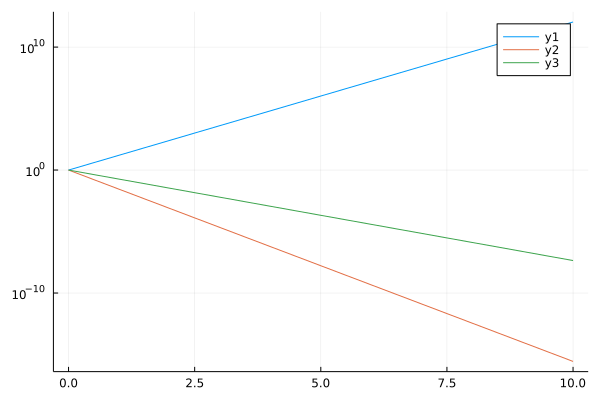

In [4]:
h = 0.5
t = range(0, 10; step=h)
n = length(t)
uᶠ = zeros(n)
uᵇ = zeros(n)
uᵗ = zeros(n)
uᶠ[1] = uᵇ[1] = uᵗ[1] = 1
a = -10
for k = 1:n-1
    uᶠ[k+1] = (1+h*a) * uᶠ[k]
    uᵇ[k+1] = (1-h*a) \ uᵇ[k]
    uᵗ[k+1] = (1-h*a/2) \ (1 + h*a/2) * uᵗ[k]
end

plot(t, abs.(uᶠ); yscale=:log10)
plot!(t, abs.(uᵇ); yscale=:log10)
plot!(t, abs.(uᵗ); yscale=:log10)

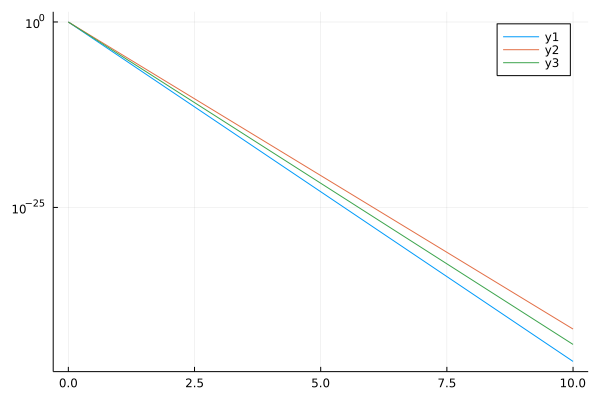

In [5]:
h = 0.01
t = range(0, 10; step=h)
n = length(t)
uᶠ = zeros(n)
uᵇ = zeros(n)
uᵗ = zeros(n)
uᶠ[1] = uᵇ[1] = uᵗ[1] = 1
for k = 1:n-1
    uᶠ[k+1] = (1+h*a) * uᶠ[k]
    uᵇ[k+1] = (1-h*a) \ uᵇ[k]
    uᵗ[k+1] = (1-h*a/2) \ (1 + h*a/2) * uᵗ[k]
end

nanabs(x) = iszero(x) ? NaN : abs(x)

plot(t, nanabs.(uᶠ); yscale=:log10)
plot!(t, nanabs.(uᵇ); yscale=:log10)
plot!(t, nanabs.(uᵗ); yscale=:log10)